In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

In [48]:
#load the data
data = pd.read_csv('C://Users//Naveena//Documents//MLDataset//water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [49]:
#----EDA----
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 43.77%


In [50]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
Sulfate,781,23.840049
ph,491,14.987790
Trihalomethanes,162,4.945055


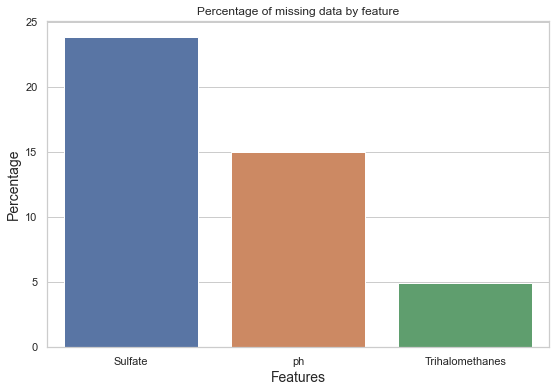

In [51]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [52]:
#---Drop Missing Values---
data.dropna(axis=0, inplace=True)
data.shape

(2011, 10)

<ipython-input-53-cd0f079093fa>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


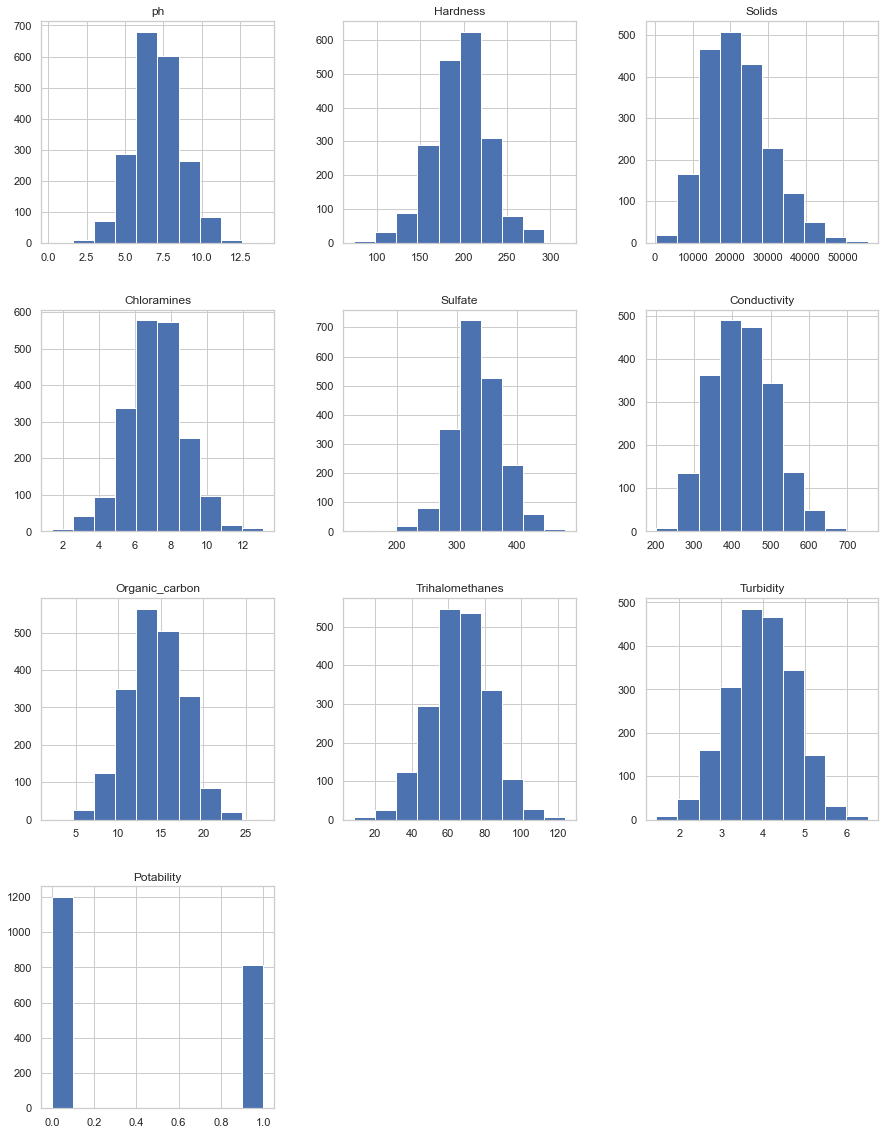

In [53]:
#--Data Distribution--
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

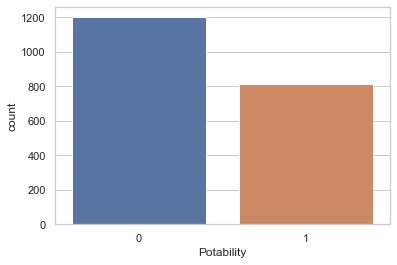

There are 1200 safe potable water consumption for humans and 811 potabilities which are not safe


In [54]:
#--Potability Counts--
sns.countplot(x='Potability',data=data)
plt.show()
cases = data.Potability.value_counts()
print(f"There are {cases[0]} safe potable water consumption for humans and {cases[1]} potabilities which are not safe")

array([<AxesSubplot:ylabel='Potability'>], dtype=object)

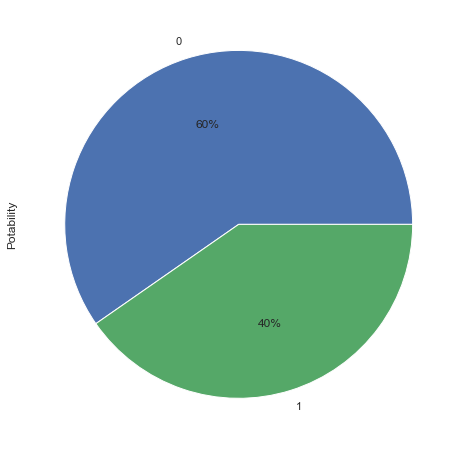

In [55]:
style.use('seaborn-deep')
labels=[0,1]
data['Potability'].value_counts().plot(kind='pie',labels=labels,subplots=True,autopct='%1.0f%%',labeldistance=1.1, figsize=(8,8))

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seabo

Text(0.5, 1.0, 'Distribution of pH')

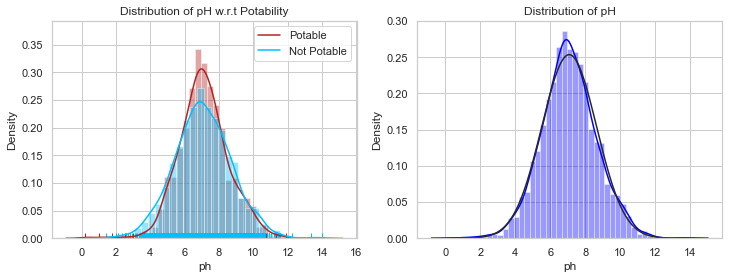

In [56]:
#----Distribution of other features w.r.t Potability----
#Distribution of pH values
from scipy.stats import norm
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['ph'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['ph'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of pH w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['ph'],fit=norm,color='blue')
plt.title('Distribution of pH')

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seabo

Text(0.5, 1.0, 'Distribution of Hardness')

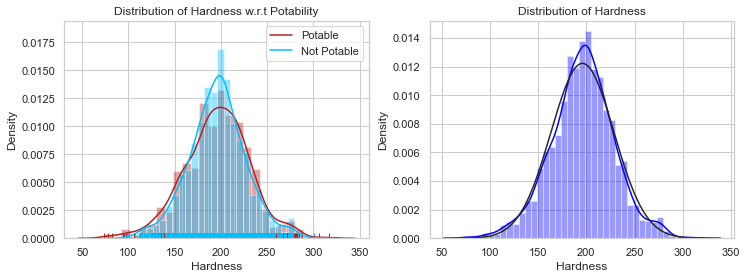

In [57]:
#Distribution of Hardness values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Hardness'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Hardness'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Hardness w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Hardness'],fit=norm,color='blue')
plt.title('Distribution of Hardness')

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seabo

Text(0.5, 1.0, 'Distribution of Solids')

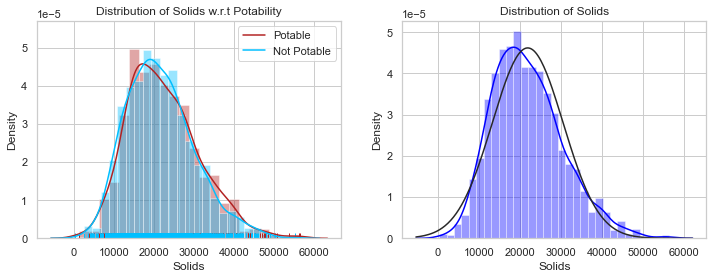

In [58]:
#Distribution of Solids values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Solids'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Solids'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Solids w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Solids'],fit=norm,color='blue')
plt.title('Distribution of Solids')

In [59]:
# here we perform square root transformation.It is one of a method to remove skewness in data

data['Solids'] = np.sqrt(data['Solids'])

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seabo

Text(0.5, 1.0, 'Distribution of Chloramines')

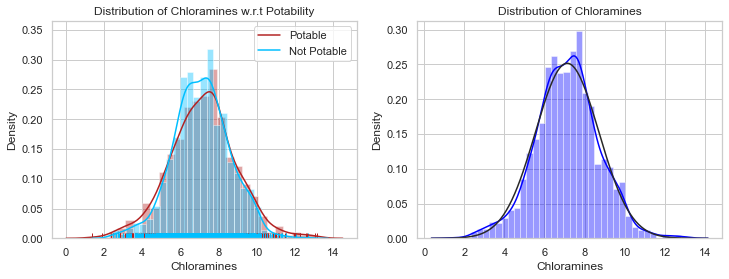

In [60]:
#Distribution of Chloramines values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Chloramines'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Chloramines'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Chloramines w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Chloramines'],fit=norm,color='blue')
plt.title('Distribution of Chloramines')

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seabo

Text(0.5, 1.0, 'Distribution of Sulfate')

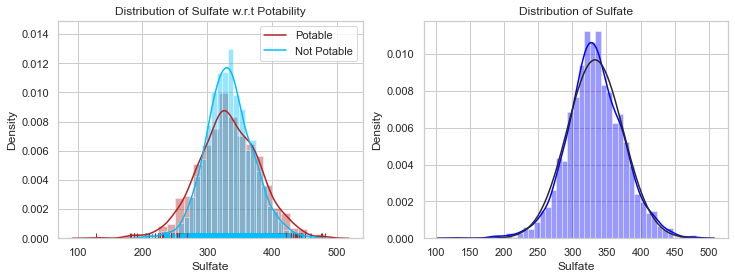

In [61]:
#Distribution of Sulfate values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Sulfate'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Sulfate'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Sulfate w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Sulfate'],fit=norm,color='blue')
plt.title('Distribution of Sulfate')

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seabo

Text(0.5, 1.0, 'Distribution of Conductivity')

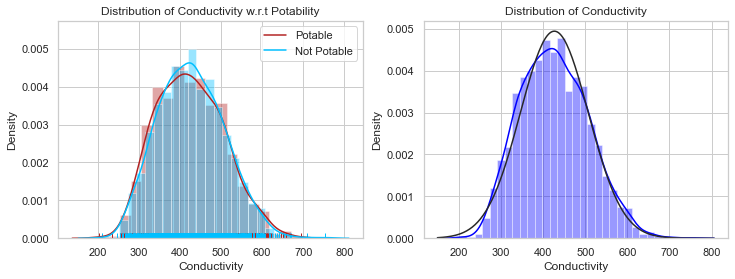

In [62]:
#Distribution of Conductivity values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Conductivity'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Conductivity'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Conductivity w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Conductivity'],fit=norm,color='blue')
plt.title('Distribution of Conductivity')

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seabo

Text(0.5, 1.0, 'Distribution of Organic_carbon')

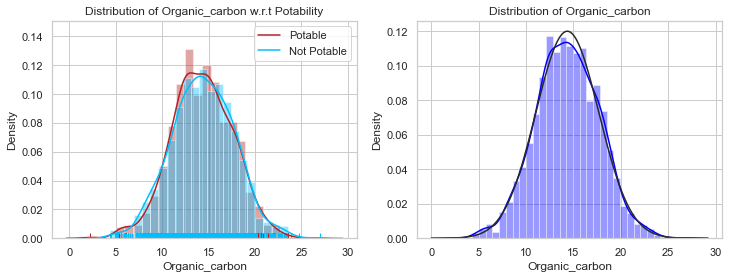

In [63]:
#Distribution of Organic_carbon values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Organic_carbon'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Organic_carbon'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Organic_carbon w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Organic_carbon'],fit=norm,color='blue')
plt.title('Distribution of Organic_carbon')

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seabo

Text(0.5, 1.0, 'Distribution of Trihalomethanes')

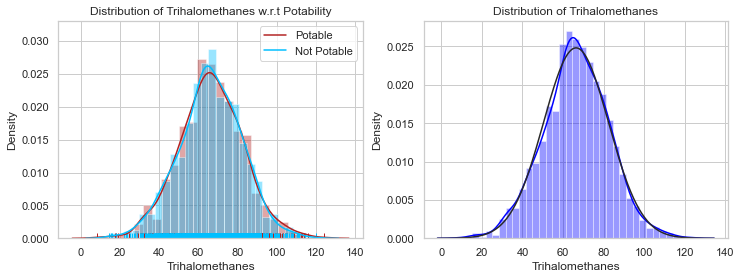

In [64]:
#Distribution of Trihalomethanes values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Trihalomethanes'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Trihalomethanes'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Trihalomethanes w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Trihalomethanes'],fit=norm,color='blue')
plt.title('Distribution of Trihalomethanes')

C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Naveena\anaconda3\lib\site-packages\seabo

Text(0.5, 1.0, 'Distribution of Turbidity')

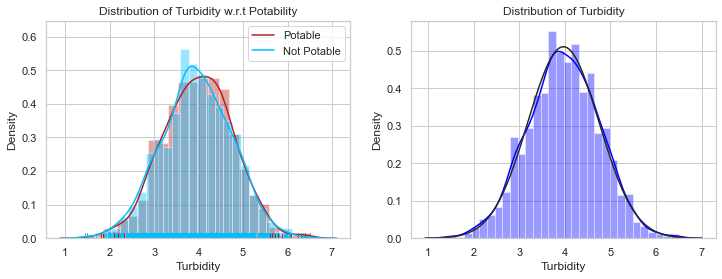

In [65]:
#Distribution of Turbidity values
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data['Turbidity'][data.Potability ==1],color='firebrick',rug=True)
sns.distplot(data['Turbidity'][data.Potability ==0],color='deepskyblue',rug=True)
plt.legend(['Potable','Not Potable'])
plt.title('Distribution of Turbidity w.r.t Potability')

plt.subplot(1,2,2)
sns.distplot(data['Turbidity'],fit=norm,color='blue')
plt.title('Distribution of Turbidity')

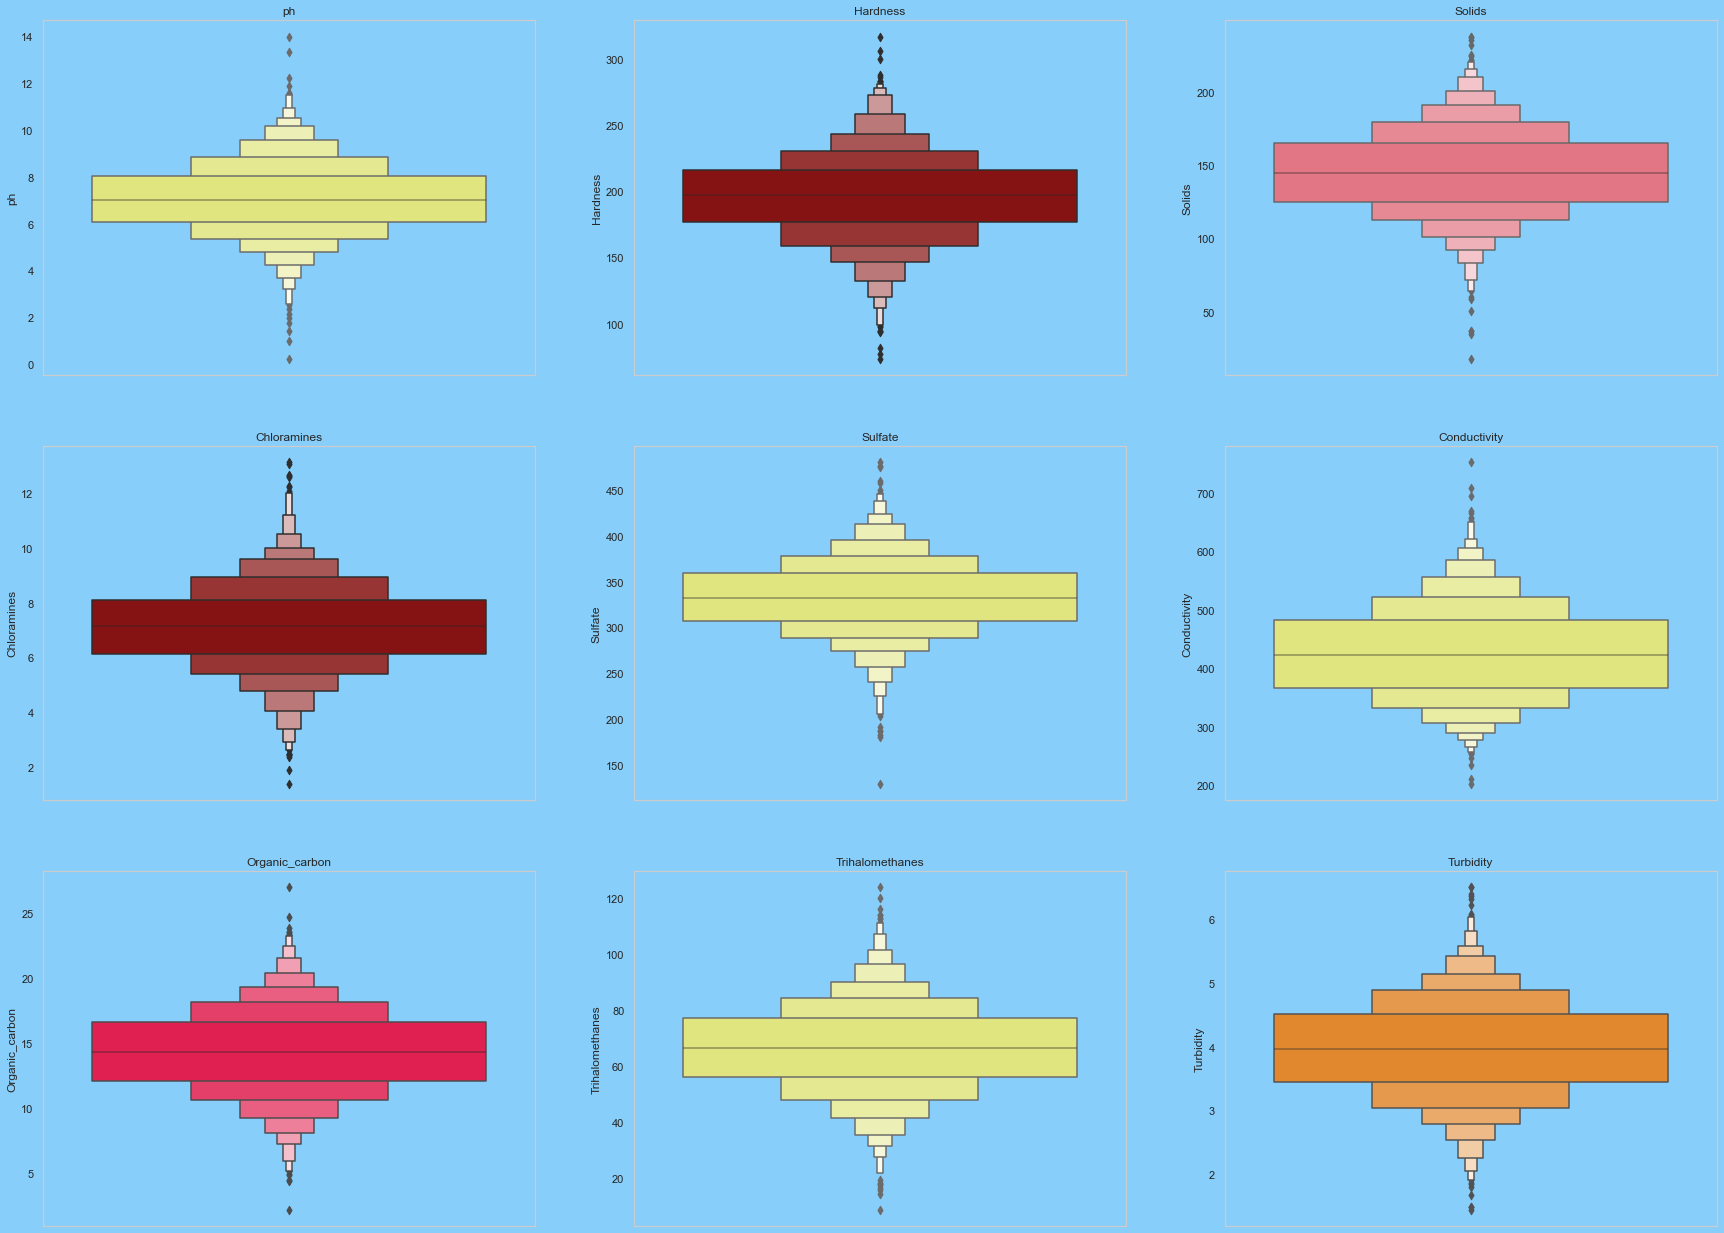

In [66]:
#Box Plot to check the outliers
#BoxPlot to check for Outliers
import random
background_color = "lightskyblue"
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig=plt.figure(figsize=(30,30))
fig.patch.set_facecolor(background_color) 
feature = [x for x in data.columns if 'Potability' not in x and 'null' not in x]
for i in enumerate(feature):
    ax=plt.subplot(4,3,i[0]+1)
    ax.set_facecolor(background_color)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxenplot(y=i[1],data=data,palette=[random.choice(color_palette)])
    plt.title(i[1])
    plt.xticks(rotation=45)

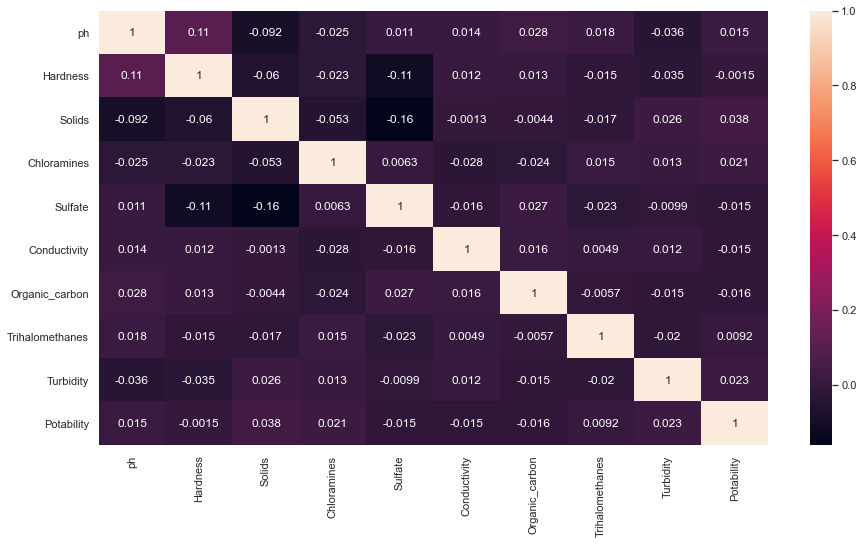

In [74]:
#Correlation Heat map
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=42, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2868FDFA440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2868FDFA440, verbose=2)

In [79]:
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate']

In [80]:
# select the top 6 features
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [81]:
import statsmodels.api as sm

In [82]:
X_top = data[top_features]
y = data['Potability']

In [83]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.673044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Potability   No. Observations:                 2011
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                            8
Date:                Sat, 12 Jun 2021   Pseudo R-squ.:                0.001892
Time:                        23:06:11   Log-Likelihood:                -1353.5
converged:                       True   LL-Null:                       -1356.1
Covariance Type:            nonrobust   LLR p-value:                    0.7436
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ph                  0.0165      0.028      0.582      0.560      -0.039       0.072
Hardness           -0.0008      0.001     -0.631      0.528      -0.003       0.002
Solids              0.0018      0.001      1.256      0.209      -0.001       0.005
Chloramines         0.0172      0.027      0.627      0.531      -0.037       0.071
Sulfate            -0.0013      0.001     -1.395      0.163      -0.003       0.001
Conductivity       -0.0006      0.001     -1.145      0.252      -0.002       0.000
Organic_carbon     -0.0131      0.013     -0.980      0.327      -0.039       0.013
Trihalomethanes     0.0002      0.003      0.082      0.935      -0.005       0.006
Turbidity           0.0342      0.056      0.615      0.538      -0.075       0.143
===================================================================================
"""

In [84]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                       5%       95%  Odds Ratio
ph               0.961713  1.074683    1.016630
Hardness         0.996672  1.001712    0.999189
Solids           0.999000  1.004586    1.001789
Chloramines      0.964036  1.073651    1.017368
Sulfate          0.996907  1.000522    0.998713
Conductivity     0.998329  1.000439    0.999384
Organic_carbon   0.961520  1.013166    0.987005
Trihalomethanes  0.994874  1.005602    1.000223
Turbidity        0.928072  1.153678    1.034745


In [86]:
#---Perform SMOTE---
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [87]:
X = data[top_features]
y = data.iloc[:,-1]

In [88]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [89]:
print(num_before, num_after)

{0: 1200, 1: 811} {0: 1200, 1: 960}


In [90]:
#Splitting data to Training and Testing set
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,9.152285,229.540413,156.718539,7.042326,372.694465,395.404362,14.253308,40.974355,3.792777,0
1,5.504452,164.500984,109.317131,6.800958,302.190494,537.539609,14.393869,69.939822,4.657361,0
2,7.476408,246.184719,164.650829,9.791961,341.163631,339.729988,16.217680,77.603021,3.478194,0
3,7.894323,176.319304,108.155476,8.198106,376.783989,383.019101,12.677488,57.280265,2.865031,0
4,8.555283,216.655356,135.415881,8.290688,311.325845,390.943089,17.138831,39.777282,3.687152,0


In [91]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,9.152285,229.540413,156.718539,7.042326,372.694465,395.404362,14.253308,40.974355,3.792777
1,5.504452,164.500984,109.317131,6.800958,302.190494,537.539609,14.393869,69.939822,4.657361
2,7.476408,246.184719,164.650829,9.791961,341.163631,339.729988,16.217680,77.603021,3.478194
3,7.894323,176.319304,108.155476,8.198106,376.783989,383.019101,12.677488,57.280265,2.865031
4,8.555283,216.655356,135.415881,8.290688,311.325845,390.943089,17.138831,39.777282,3.687152


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

In [93]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [95]:
#MODELS

In [96]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [100]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(solver='liblinear'),param_grid=params,cv=10)

In [101]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [102]:

#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [103]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 58.56%


<AxesSubplot:>

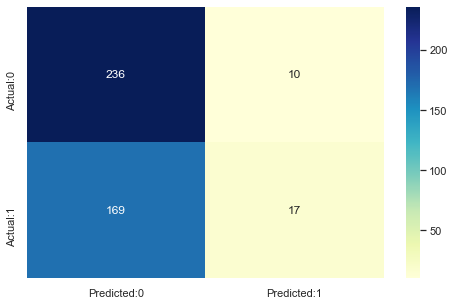

In [104]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [105]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.58      0.96      0.73       246
           1       0.63      0.09      0.16       186

    accuracy                           0.59       432
   macro avg       0.61      0.53      0.44       432
weighted avg       0.60      0.59      0.48       432



In [106]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 15.96%


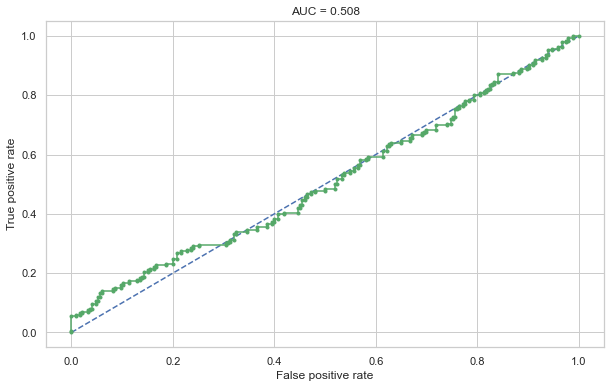

In [107]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [112]:
from sklearn.neighbors import KNeighborsClassifier
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [113]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [114]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [115]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 69.44%


<AxesSubplot:>

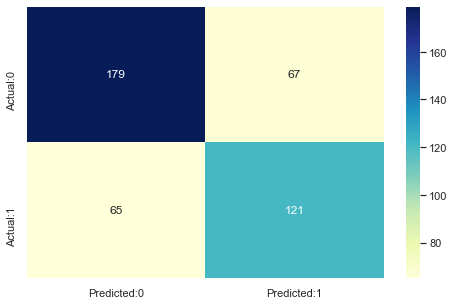

In [116]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [117]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       246
           1       0.64      0.65      0.65       186

    accuracy                           0.69       432
   macro avg       0.69      0.69      0.69       432
weighted avg       0.69      0.69      0.69       432



In [118]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 64.71%


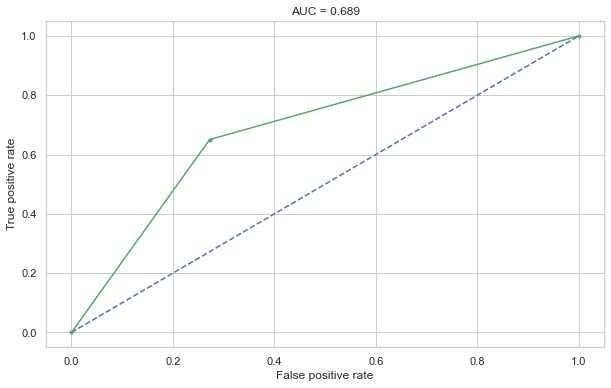

In [119]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [121]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [122]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 12}

In [123]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [124]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 61.81%


<AxesSubplot:>

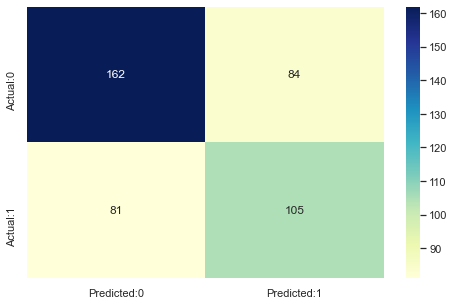

In [125]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [126]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       246
           1       0.56      0.56      0.56       186

    accuracy                           0.62       432
   macro avg       0.61      0.61      0.61       432
weighted avg       0.62      0.62      0.62       432



In [143]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 56.0%


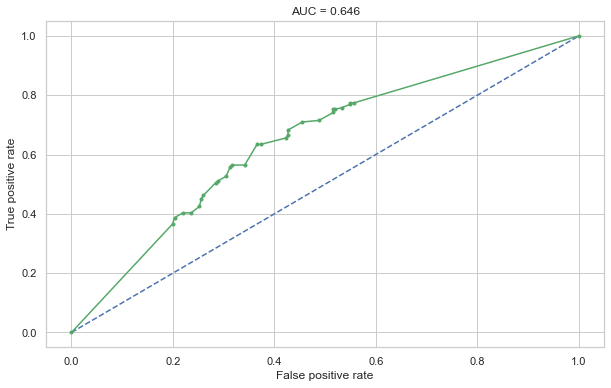

In [144]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

In [142]:
from sklearn.svm import SVC

In [135]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [136]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 1, 'gamma': 0.1}

In [137]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [138]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 70.14%


<AxesSubplot:>

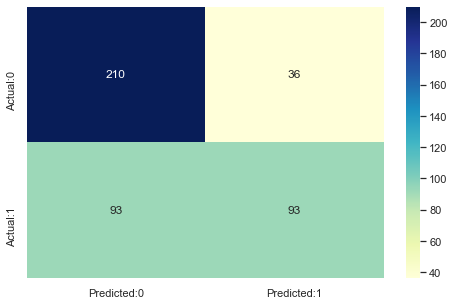

In [145]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [146]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.69      0.85      0.77       246
           1       0.72      0.50      0.59       186

    accuracy                           0.70       432
   macro avg       0.71      0.68      0.68       432
weighted avg       0.71      0.70      0.69       432



In [147]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 59.05%


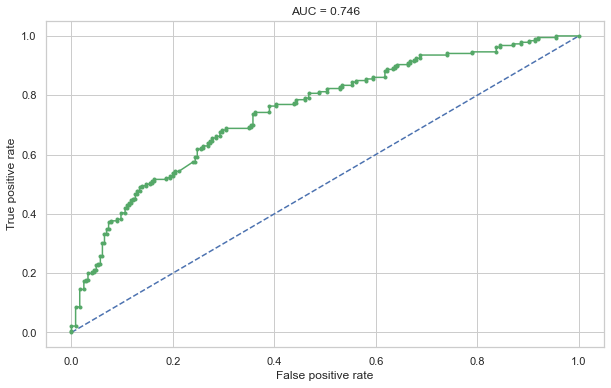

In [148]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

In [154]:
#Comparison
comparison = pd.DataFrame({
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [155]:
comparison

,Accuracy,AUC,F1 score
K-nearest neighbours,0.694444,0.689090,0.647059
Decision trees,0.618056,0.645751,0.560000
Support vector machine,0.701389,0.746219,0.590476


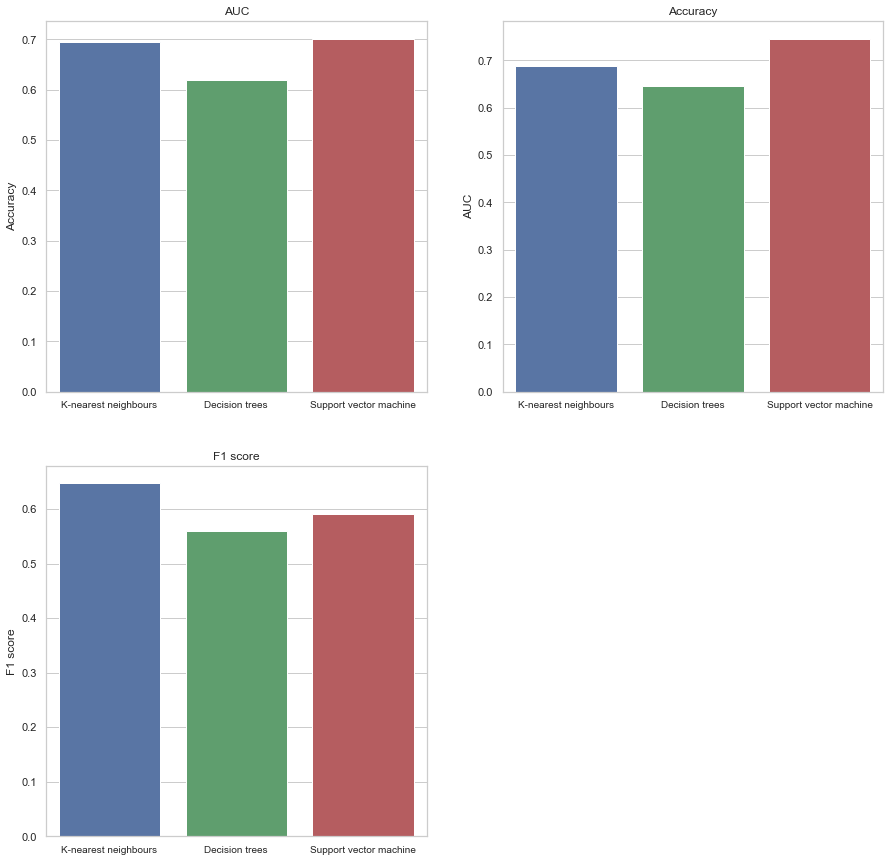

In [156]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()